In [88]:
from model import FOMO
import tensorflow_datasets as tfds
import tensorflow as tf

FOMO = FOMO().modelKeras()
BATCH_SIZE = 16
AUTOTUNE = tf.data.experimental.AUTOTUNE

print('imports done!')

KerasTensor(type_spec=TensorSpec(shape=(None, 52, 52, 3), dtype=tf.float32, name=None), name='logits/BiasAdd:0', description="created by layer 'logits'")
imports done!


In [82]:
FOMO.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.CosineSimilarity()
    ],
    optimizer='nadam'
)

In [75]:
(train, test, valid), info = tfds.load(
    'tfDataset',
    split=['train', 'test', 'valid'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

tfds.core.DatasetInfo(
    name='tf_dataset',
    full_name='tf_dataset/1.0.0',
    description="""
    dataset for realtime centroid detection mask/!mask for
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/tf_dataset',
    data_path='/home/argovil/tensorflow_datasets/tf_dataset/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=104.84 MiB,
    features=FeaturesDict({
        'image': Image(shape=(416, 416, 3), dtype=tf.uint8),
        'label': Tensor(shape=(52, 52, 2), dtype=tf.uint8),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=336, num_shards=1>,
        'train': <SplitInfo num_examples=2400, num_shards=1>,
        'valid': <SplitInfo num_examples=587, num_shards=1>,
    },
    citation="""""",
)


2022-11-23 22:50:48.369272: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


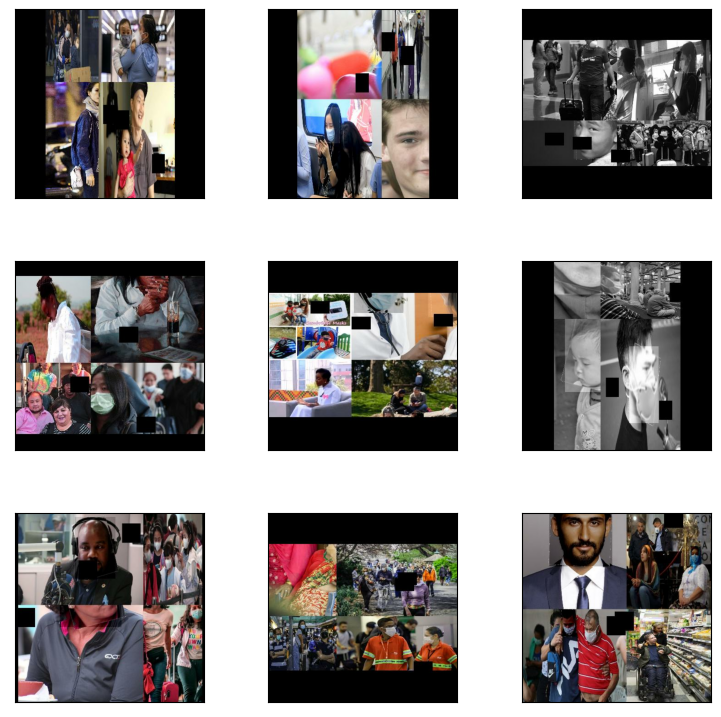

In [76]:
print(info)
fig = tfds.show_examples(train, info, rows=3, cols=3)

In [77]:
def pre_process(image, label):
    return tf.cast(image, tf.float32)/255, label

def data_process(ds, split:str):
    ds = ds.map(pre_process, num_parallel_calls = AUTOTUNE)
    ds = ds.cache()
    ds = ds.shuffle(info.splits[split].num_examples)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds

In [78]:
train, test, valid = data_process(train, 'train'), data_process(test, 'test'), data_process(valid, 'valid')

In [80]:
FOMO.fit(
    train, epochs=5, verbose=2
)

Epoch 1/5


ValueError: in user code:

    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 2027, in binary_focal_crossentropy
        backend.binary_focal_crossentropy(
    File "/home/argovil/miniconda3/lib/python3.9/site-packages/keras/backend.py", line 5339, in binary_focal_crossentropy
        p_t = (target * sigmoidal) + ((1 - target) * (1 - sigmoidal))

    ValueError: Dimensions must be equal, but are 2 and 3 for '{{node binary_focal_crossentropy/mul}} = Mul[T=DT_FLOAT](binary_focal_crossentropy/Cast, model_9/logits/BiasAdd)' with input shapes: [?,52,52,2], [?,52,52,3].
